In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# hyper-paramters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [ ]:
# toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# linear regression
model = nn.Linear(input_size, output_size)

# choose loss function and optimizer
criterion = nn.MSELoss()         
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# train model
#
# concepts: 
# batch      -- split samples into smaller parts
# batch size -- number of data in one batch
# epoch      -- all samples are trained with forward and backward once
# iteration  -- in one epoch, batch = iteration
# 
# e.g. total 2000 samples, split it into 5 batches, so the batch size is 400, 
#      in one epoch, all samples(5 batched) should be trained, so exists 5 iterations
#
# Normally, just training all samples one epoch is not enough, should more epochs.

for epoch in range(num_epochs):
    # convert np array to torch tensor
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # forward pass  1. compute output 2. compute loss
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # backward and optimize
    optimizer.zero_grad()       # 1. optimizer clean
    loss.backward()             # 2. backward
    optimizer.step()

    # every 5 times print information
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 3.0007
Epoch [10/60], Loss: 1.3178
Epoch [15/60], Loss: 0.6360
Epoch [20/60], Loss: 0.3598
Epoch [25/60], Loss: 0.2479
Epoch [30/60], Loss: 0.2025
Epoch [35/60], Loss: 0.1841
Epoch [40/60], Loss: 0.1767
Epoch [45/60], Loss: 0.1737
Epoch [50/60], Loss: 0.1724
Epoch [55/60], Loss: 0.1719
Epoch [60/60], Loss: 0.1717


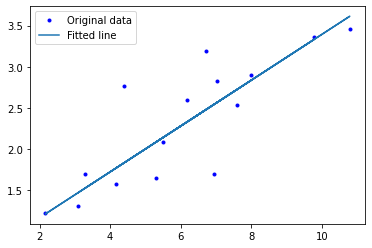

In [ ]:
# plot graph
predict = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'b.', label='Original data')
plt.plot(x_train, predict, label='Fitted line')
plt.legend()
plt.show()

# save model checkpoint
torch.save(model.state_dict(), 'model.pkl')